      _Age  Female    Male  Male_Inverse  OBJECTID
0   0 - 10  201383  203364       -203364         0
1  10 - 20  167891  161726       -161726         1
2  20 - 30  191610  170215       -170215         2
3  30 - 40  125333  133602       -133602         3
4  40 - 50   72516   78706        -78706         4
5  50 - 60   38033   40566        -40566         5
6  60 - 70   24267   22281        -22281         6
7  70 - 80   13633   10654        -10654         7
8      80+   10918    6130         -6130         8


Encoded Data:
    _Age  Female  Male  Male_Inverse  OBJECTID
0     0       8     8             0         0
1     1       6     6             2         1
2     2       7     7             1         2
3     3       5     5             3         3
4     4       4     4             4         4
5     5       3     3             5         5
6     6       2     2             6         6
7     7       1     1             7         7
8     8       0     0             8         8


Unnormalize

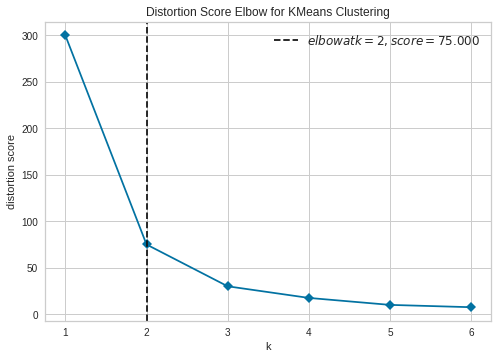

cluster centroids:
 [[ 0.50423093  0.00788296]
 [-0.40338474 -0.00630637]]

 cluster assignments:
 [0 0 0 0 1 1 1 1 1]

 original data:
       _Age  Female    Male  Male_Inverse  OBJECTID
0   0 - 10  201383  203364       -203364         0
1  10 - 20  167891  161726       -161726         1
2  20 - 30  191610  170215       -170215         2
3  30 - 40  125333  133602       -133602         3
4  40 - 50   72516   78706        -78706         4
5  50 - 60   38033   40566        -40566         5
6  60 - 70   24267   22281        -22281         6
7  70 - 80   13633   10654        -10654         7
8      80+   10918    6130         -6130         8
KMeans(n_clusters=2)
Merged data:
       _Age  Female    Male  Male_Inverse  OBJECTID  clusters
0   0 - 10  201383  203364       -203364         0         0
1  10 - 20  167891  161726       -161726         1         0
2  20 - 30  191610  170215       -170215         2         0
3  30 - 40  125333  133602       -133602         3         0
4  40 - 50   

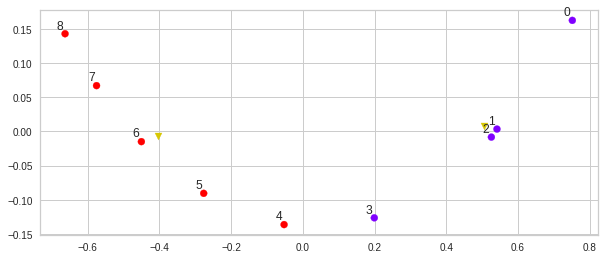

In [7]:
# Supress future warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


#i.selection
#a.Select relevant libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#b.Data source
path = '/home/edwin/Documents/datamining/Kiambu_Pop_Pyramid_Age_Groups_-_2009.csv'
Attributes = ['_Age','Female','Male','Male_Inverse','OBJECTID']  
Data = pd.read_csv(path,names=Attributes)
print(Data)

# Data Transformation

# 1. Using labelling(converting words to numerals)
Encoder = preprocessing.LabelEncoder()
EncodedData = Data.apply(Encoder.fit_transform)
print('\n\nEncoded Data:\n',EncodedData)

# 2. Using Normalizer(rescales the values in a range of 0-1[0,1])
Numeric_data = EncodedData.values
print('\n\nUnnormalized data/Unstandardized data/Unbinarized data:\n',Numeric_data)

normalized_values = preprocessing.normalize(Numeric_data)
print('\n\nNormalized Values(rescaled to [0,1]):\n',normalized_values)

# 3. Using Standardization
## This is rescaling data to a normal distribution with a mean of 0 and a standard deviation of 1(unit variance)
standardized_data = preprocessing.scale(Numeric_data)
print('\n\nStandardized Data:\n',standardized_data)

# 4.Using Binarizer(Converting to Binary)
## this is done by replacing all values above the threshold with one(1) and those below with zero(0)
Binarizer = Binarizer(threshold=1.0).fit(Numeric_data)
Binarized_data = Binarizer.transform(Numeric_data)
print('\n\nBinarized Data:\n',Binarized_data)

# 5. Using compression(decompose)
## Principal component analysis(PCA) is used to reduce number of attributes to two attributes.
## PCA is used to reduce size of feature space while retaining as much information as possible
pca = PCA(n_components=2)
pca.fit(normalized_values)
decomposed_data = pca.transform(normalized_values)
print('\n\nDecomposed Data:\n',decomposed_data)

# mine the data
kelbow_visualizer(KMeans(random_state=4),Numeric_data,k=(1,7),timings=False)
kmeans_algorithm = KMeans(n_clusters=2)
clusters = kmeans_algorithm.fit(decomposed_data)
centroids = clusters.cluster_centers_
print("cluster centroids:\n",centroids)
cluster_assignments = kmeans_algorithm.labels_
print("\n cluster assignments:\n",cluster_assignments)

# Print original data
print("\n original data:\n",Data)
Clusters = pd.DataFrame(data=cluster_assignments,columns=["clusters"])
print(clusters)

# show clusters column
clustered_data = pd.concat([Data,Clusters],axis=1)
print("Merged data:\n",clustered_data)
clustered_data.to_excel("/home/edwin/Documents/datamining/clustered_data.xlsx",sheet_name="sheet_name_1")

# draw graph
labels = range(0,25)
plt.figure(figsize=(10,4))
plt.subplots_adjust(bottom=0.1)
plt.scatter(decomposed_data[:,0],decomposed_data[:,1],c=clusters.labels_,label='True position',cmap='rainbow')

plt.scatter(centroids[:,0],centroids[:,1],marker='v',color='y')

for label,x,y in zip(labels,decomposed_data[:,0],decomposed_data[:,1]):
    plt.annotate(label,
                 xy=(x,y),xytext=(-2,2),
                 textcoords='offset points',ha='right',va='bottom')
plt.show()